In [25]:
def get_predicted_V(t, S, X, A):
    r1 = get_r1(S, X)*100
    return 8*A*r1*t

def get_loss_function(p):
    loss = 0.
    for V, t in zip(Vs, times):
        V_pred = get_predicted_V(t, p[0])
        loss += (V - V_pred)**2
    return loss

ans = fmin(func=get_loss_function, x0 = [0.5])
print('K = ', ans[0])


NameError: name 'fmin' is not defined

In [5]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

In [48]:
#ANODE

#Establish constants:
Am = 0.00114  #cross sectional salt bridge area, m^2
V = 0.00709 #volume of anode chamber, m^2
Yac = 0.05 #bacterial yield, dimensionless
Kdec = 8.33 * 10**-4 #decay constant for substrate utilization, 1/hr
F = 96485 #Faraday's constant, C/mol
R = 8.31 #gas constant, J/K mol
T = 298 #room temperature, K
k1o = 0.207 #forward rate constant of anode reaction, mol/m^2hr
alpha = 0.051 #charge transfer coefficient of anode, dimensionless
nA = -0.1 #anodic overpotential, J/C
Ks = 0.592 #Michaelis constant for substrate uptake, mol/m^3

#function to find reaction rate
def get_r1(S,X):
    return k1o*np.exp((alpha*F*nA)/(R*T))*(S/(Ks + S))*X

#system of diff eqs
def get_anode_Cs(C, t):
    S, CO2, H, X = C
    r1 = get_r1(S, X)*100
    dSdt = -A*r1
    dCO2dt = 2*A*r1
    dHdt = 8*A*r1
    dXdt = A*Yac*r1 - V*Kdec*X
    return [dSdt/V, dCO2dt/V, dHdt/V, dXdt/V]

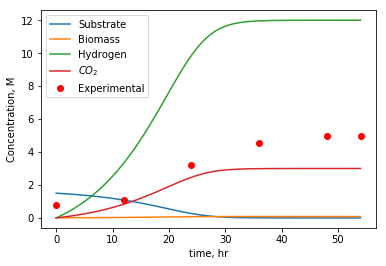

In [49]:
Vs = [0.7996, 1.088, 3.2425, 4.535, 5., 5.]
timeV = [0., 12., 24., 36., 48., 54.]

times = np.linspace(0., 54., 108)
ans = odeint(func=get_anode_Cs, y0=[1.5, 0., 0., 0.01], t=times)

Ss = ans[:, 0]
CO2s = ans[:, 1]
Hs = ans[:, 2]
Xs = ans[:, 3]

fig, ax = plt.subplots()
ax.plot(times, Ss, label='Substrate')
ax.plot(times, Xs, label='Biomass')
ax.plot(times, Hs, label='Hydrogen')
ax.plot(times, CO2s, label='$CO_2$')
ax.plot(timeV, Vs, 'ro', label='Experimental')

ax.legend()
ax.set_xlabel('time, hr')
ax.set_ylabel('Concentration, M')

fig.savefig('plot.jpg')

Text(0, 0.5, 'Concentration, M')

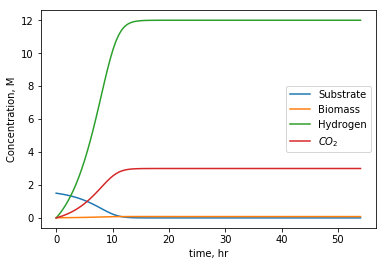

In [27]:

times = np.linspace(0., 54., 108)
ans = odeint(func=get_anode_Cs, y0=[1.5, 0., 0., 0.01], t=times)

Ss = ans[:, 0]
CO2s = ans[:, 1]
Hs = ans[:, 2]
Xs = ans[:, 3]

fig, ax = plt.subplots()
ax.plot(times, Ss, label='Substrate')
ax.plot(times, Xs, label='Biomass')
ax.plot(times, Hs, label='Hydrogen')
ax.plot(times, CO2s, label='$CO_2$')

ax.legend()
ax.set_xlabel('time, hr')
ax.set_ylabel('Concentration, M')

In [127]:
Xs[99]

0.08254444590652729

In [121]:
#CATHODE

#Establish constants:
Am = 0.00114  #cross sectional salt bridge area, m^2
V = 0.00709 #volume of anode chamber, m^2
F = 96485 #Faraday's constant, C/mol
R = 8.31 #gas constant, J/K mol
T = 298 #room temperature, K
k2o = 3.288 * 10**-5 #forward rate constant of anode reaction, m^12/mol^4 hr
beta  = 0.663 #charge transfer coefficient of cathode, dimensionless
nC = -0.5 #cathodic overpotential, J/C
KO2 = 0.004 #Michaelis constant for oxygen production, mol/m^3
icell = 1.937 #from experimental calculations
Nm = (3600*icell)/F

def get_r2(O2):
    return -k2o*(O2/(KO2 + O2))*np.exp((beta-1)*(F/(R*T))*nC)

def get_cathode_Cs(C, t):
    O2, OH, M = C
    r2 = get_r2(O2)
    dO2dt = r2*Am
    dOHdt = -4*r2*Am
    dMdt = Nm*Am
    return [dO2dt/V, dOHdt/V, dMdt/V]

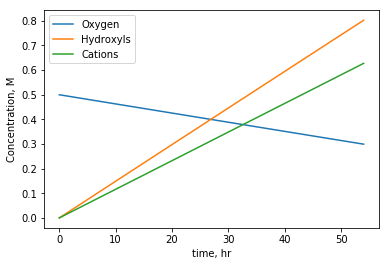

In [122]:
times = np.linspace(0., 54., 100)
ans = odeint(func=get_cathode_Cs, y0=[0.5, 0., 0.], t=times)

O2s = ans[:, 0]
OHs = ans[:, 1]
Ms = ans[:, 2]

fig, ax = plt.subplots()
ax.plot(times, O2s, label='Oxygen')
ax.plot(times, OHs, label='Hydroxyls')
ax.plot(times, Ms, label='Cations')

ax.legend()
ax.set_xlabel('time, hr')
ax.set_ylabel('Concentration, M')

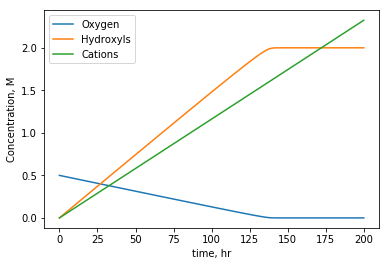

In [123]:
times = np.linspace(0., 200., 100)
ans = odeint(func=get_cathode_Cs, y0=[0.5, 0., 0.], t=times)

O2s = ans[:, 0]
OHs = ans[:, 1]
Ms = ans[:, 2]

fig, ax = plt.subplots()
ax.plot(times, O2s, label='Oxygen')
ax.plot(times, OHs, label='Hydroxyls')
ax.plot(times, Ms, label='Cations')

ax.legend()
ax.set_xlabel('time, hr')
ax.set_ylabel('Concentration, M')